In [1]:
#actualise automatiquement les modules importés
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch

from ADVI.advi2 import ADVI2
from ADVI.ppca import PPCA_with_ARD_model

[[ 1.]
 [-1.]]
True principal axes:
[[ 1.]
 [-1.]]
Shift:
[ 0. 10.]


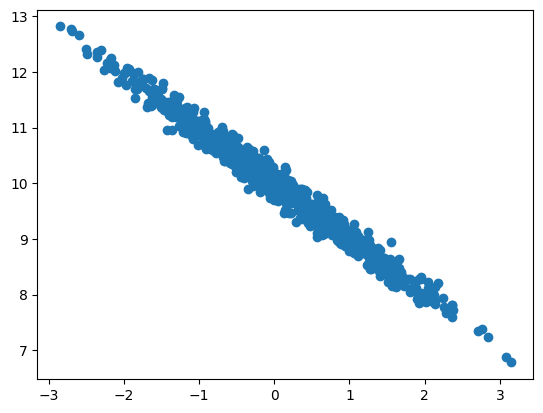

In [2]:
# note that in the function below D should be greater then K
def build_toy_dataset(N, D, K, sigma=1):
    x_train = np.zeros([D, N])
    w = np.zeros([D,K])
    for k in range(K):
        w[k,k]=1.0/(k+1)
        w[k+1,k]=-1.0/(k+1)
    print(w)
    z = np.random.normal(0.0, 1.0, size=(K, N))
    mean = np.dot(w, z)
    shift=np.zeros([D])
    shift[1]=10
    for d in range(D):
      for n in range(N):
        x_train[d, n] = np.random.normal(mean[d, n], sigma)+shift[d]
    print("True principal axes:")
    print(w)
    print("Shift:")
    print(shift)
    return x_train.astype(np.float32,copy=False)


#ed.set_seed(142)

N = 1000  # number of data points
D = 2  # data dimensionality
K = 1  # latent dimensionality

# DATA

x_train = build_toy_dataset(N, D, K, sigma = 0.1)
x_train = torch.tensor(x_train).permute(1,0)
plt.plot(x_train[:,0],x_train[:, 1],'o')

Fitting...: 100%|██████████| 20/20 [00:57<00:00,  2.87s/it]


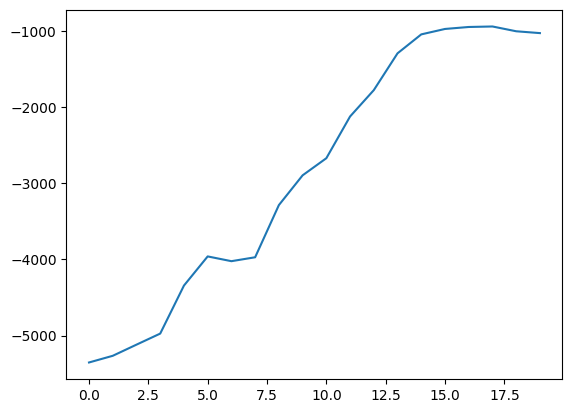

In [15]:
#actualise automatiquement les modules importés
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch

from ADVI.advi2 import ADVI2
from ADVI.ppca import PPCA_model, PPCA_with_ARD_model

ppca_K = 2
model = PPCA_with_ARD_model(D, ppca_K)
param_keys = model.named_params
param_dims = model.dim_parameters
key_pos = model.key_pos
advi = ADVI2(model, 1, batch_size=10, lr=0.01, mode='meanfield', num_epochs=20)

%matplotlib inline
advi.fit(x_train, method="Adam", plotting=True)

In [16]:
advi.model_params.vparams[0]

tensor([-0.7493,  1.2508,  0.7498, -1.2295,  0.0103,  9.9438, -4.8167, -4.5253,
        -2.2461, -0.2523], grad_fn=<SelectBackward0>)

In [17]:
advi.model_params.vparams[1]

tensor([-1.4054, -3.9191, -1.4052, -4.0241, -4.4504, -4.3022, -2.1874, -1.7652,
        -0.8985, -3.1487], grad_fn=<SelectBackward0>)

In [18]:
ppca_K = 2

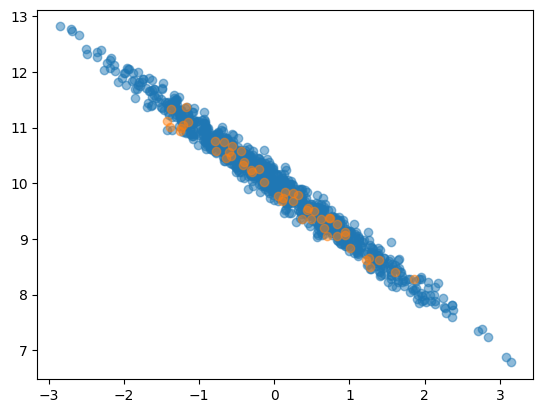

In [19]:
W = advi.model_params.vparams[0, :D*ppca_K].view(D, ppca_K).detach()
mean = advi.model_params.vparams[0, D*ppca_K:D*ppca_K + D].detach()
log_sigma = advi.model_params.vparams[0, D*ppca_K + D:D*ppca_K + 2*D].detach()
log_alpha = advi.model_params.vparams[0, D*ppca_K + 2*D:].detach()
samples = model.rsample(50, W, mean, torch.exp(log_sigma), torch.exp(log_alpha))

plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.5)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

In [20]:
print(torch.exp(log_alpha))

tensor([0.1058, 0.7770])
